In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('titanic_data.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


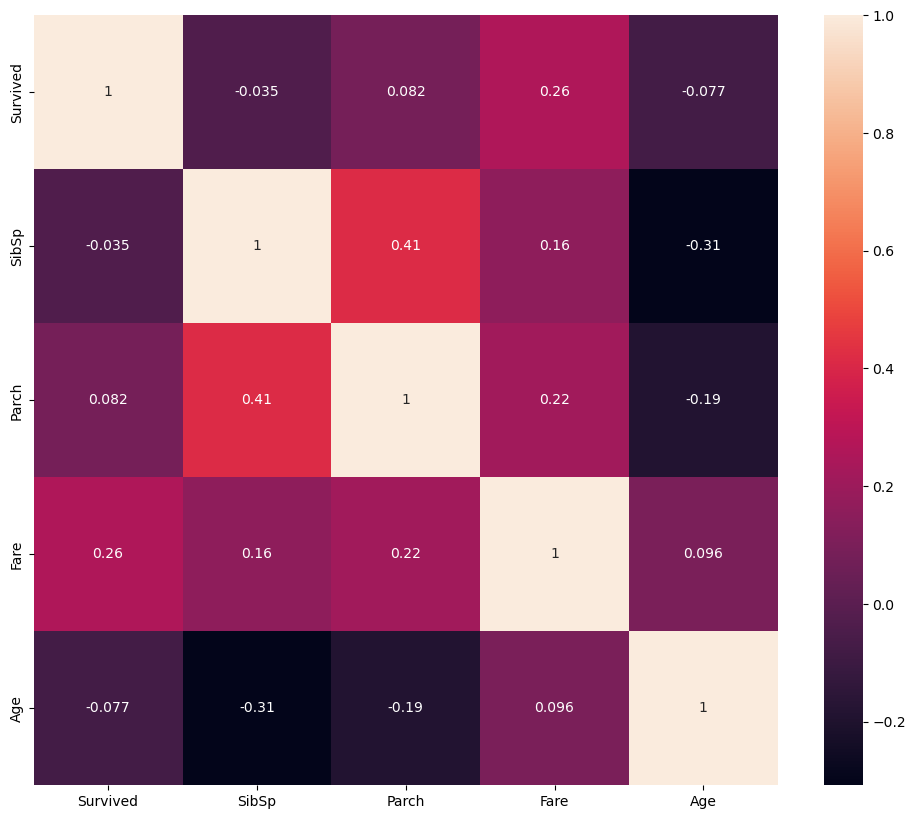

In [12]:
plt.figure(figsize = (12,10))
heatmap = sns.heatmap(data[['Survived','SibSp','Parch','Fare','Age']].corr(), annot = True)

## sibsp - Number of siblings / spouses aboard the Titanic

In [13]:
data['SibSp'].nunique()

7

In [14]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


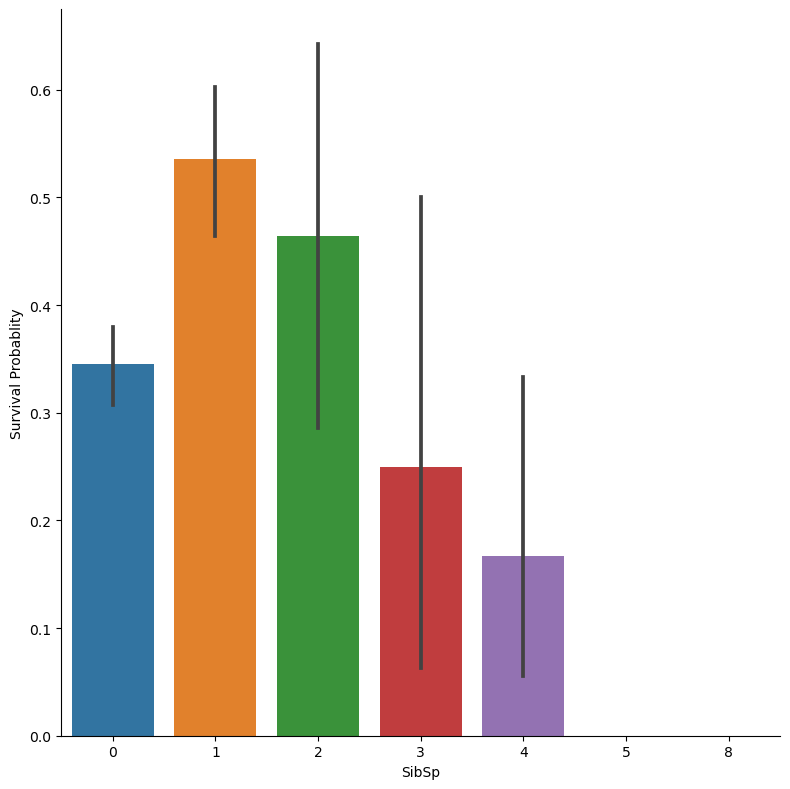

In [20]:
sns.catplot(x='SibSp', y='Survived', data=data, kind='bar', height = 8).set_ylabels('Survival Probablity')

## Age

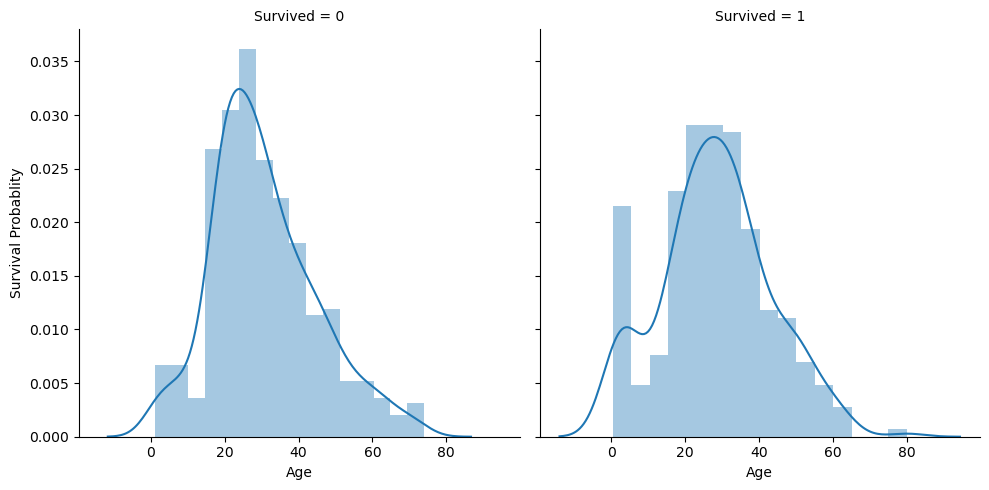

In [29]:
age_visual = sns.FacetGrid(data, col = 'Survived', height = 5)
age_visual = age_visual.map(sns.distplot, 'Age').set_ylabels('Survival Probablity')

## Sex

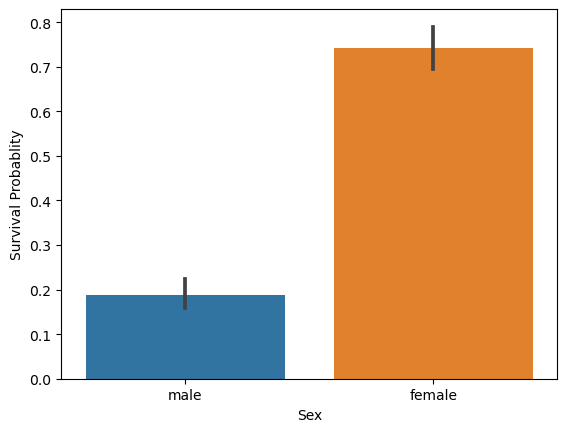

In [23]:
age_plot = sns.barplot(x = 'Sex', y = 'Survived', data = data).set_ylabel('Survival Probablity')

In [24]:
data[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


## P_Class

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


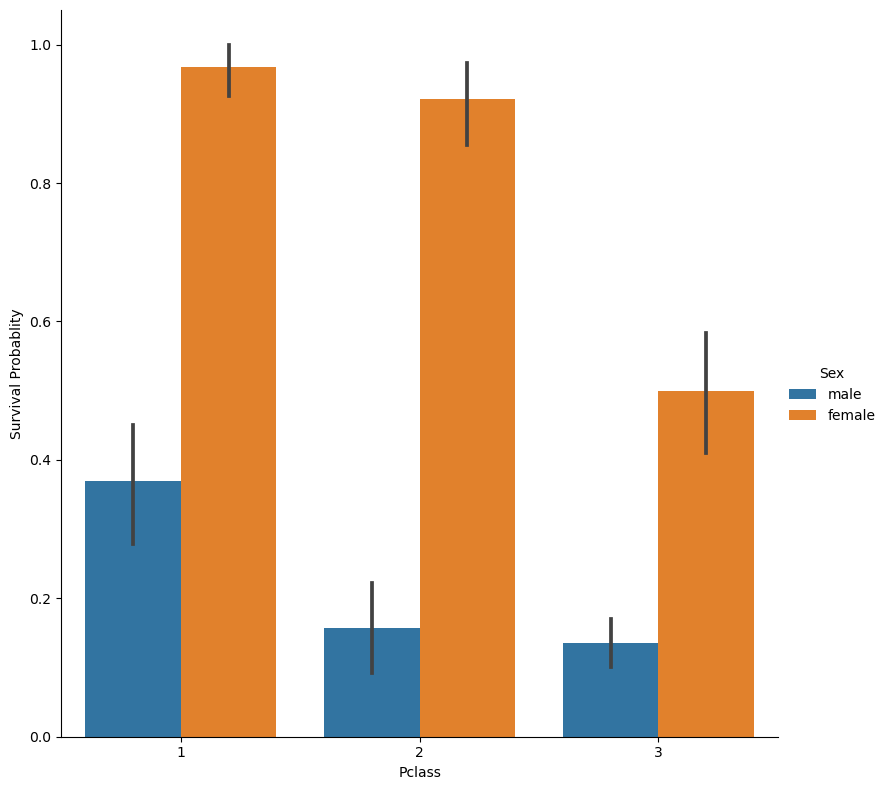

In [26]:
sns.catplot(x='Pclass', y='Survived', data=data, kind='bar', height = 8, hue = 'Sex').set_ylabels('Survival Probablity')

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


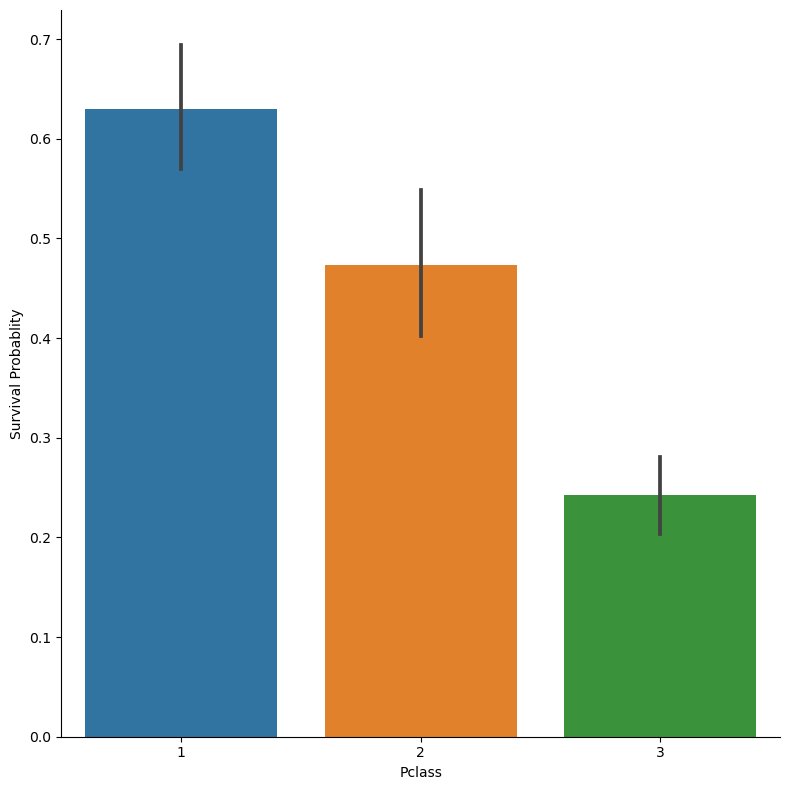

In [27]:
sns.catplot(x='Pclass', y='Survived', data=data, kind='bar', height = 8).set_ylabels('Survival Probablity')

## Embarked

In [31]:
data['Embarked'].isnull().sum()

2

In [32]:
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [33]:
data['Embarked'] = data['Embarked'].fillna('S')

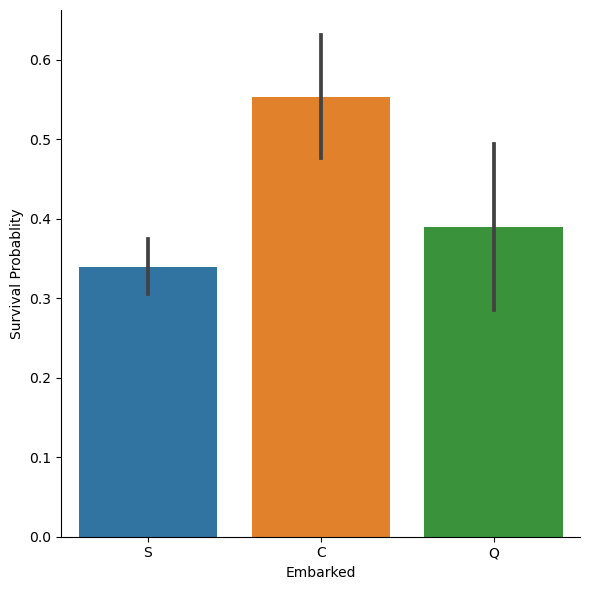

In [34]:
sns.catplot(x='Embarked', y='Survived', data=data, kind='bar', height = 6).set_ylabels('Survival Probablity')

## Explore Pclass vs Embarked

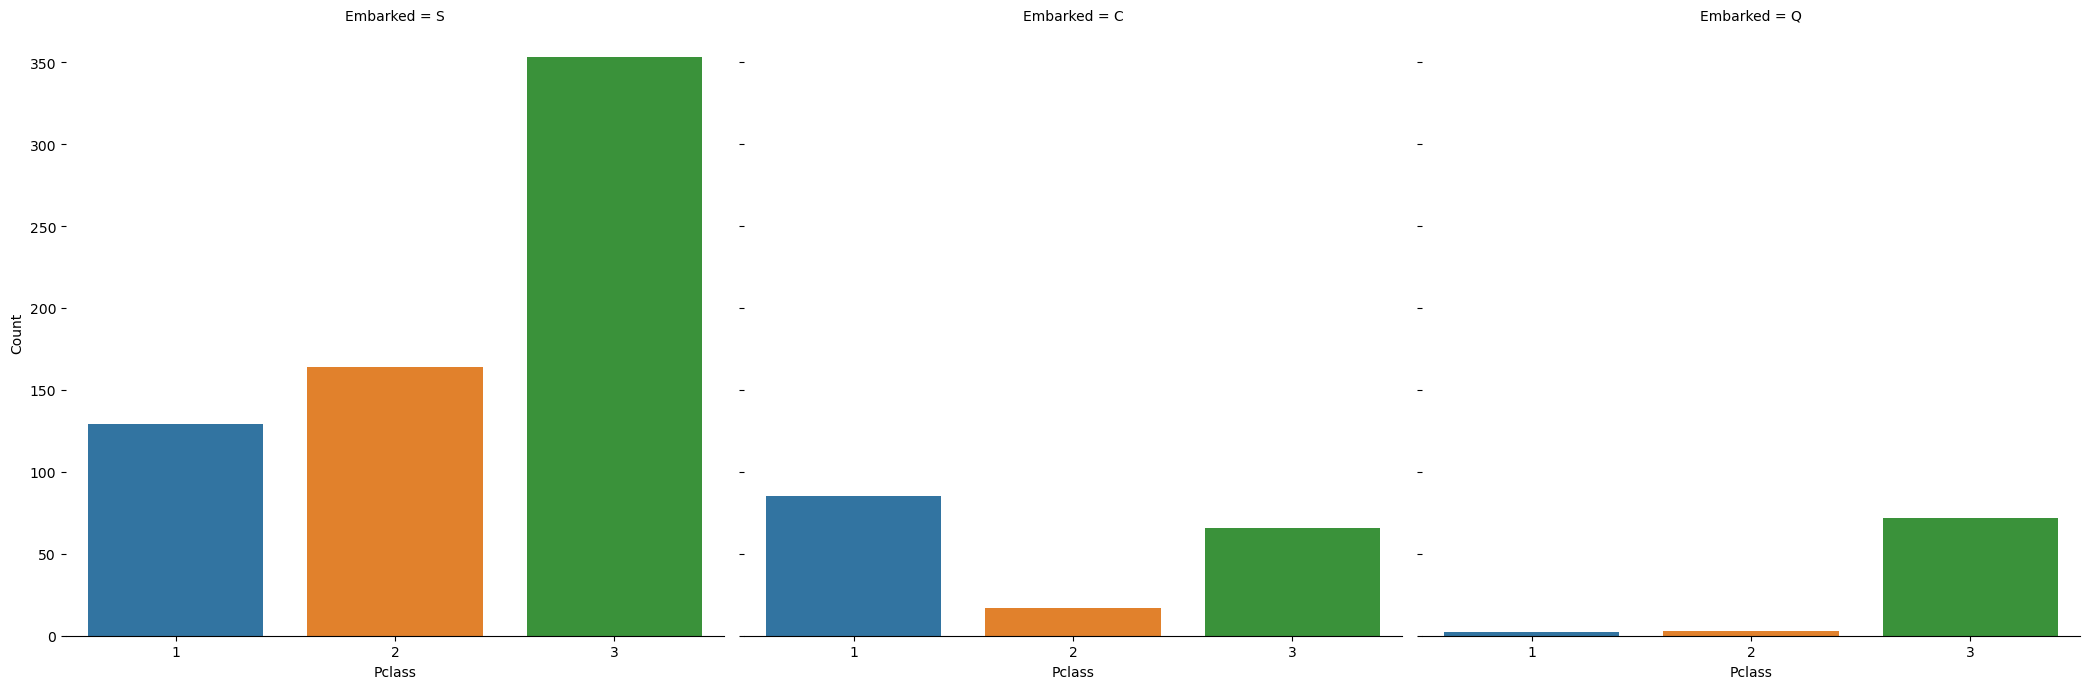

In [38]:
q = sns.catplot(x = 'Pclass', col = 'Embarked', data = data , kind = 'count', height = 7)
q.despine(left = True)
q = q.set_ylabels('Count')


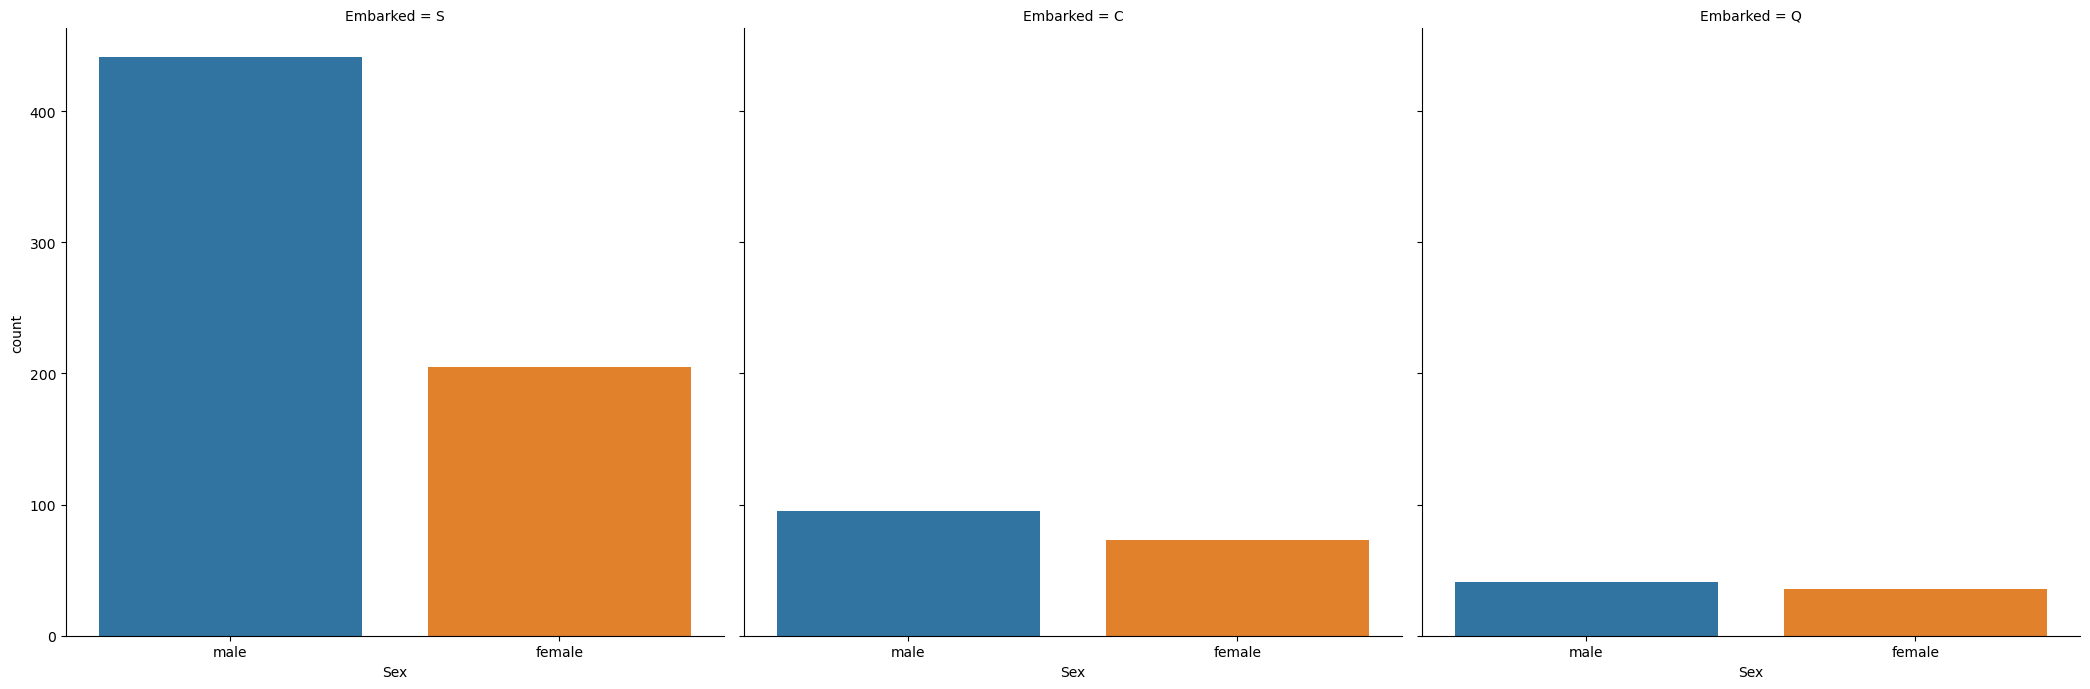

In [41]:
q = sns.catplot(x = 'Sex', col = 'Embarked', data = data , kind = 'count', height = 7)


## Preparing the data for Training

In [42]:
data = pd.read_csv('titanic_data.csv')

In [43]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [45]:
mean = data['Age'].mean()
std = data['Age'].std()

is_null = data['Age'].isnull().sum()

In [46]:
print(mean, std, is_null)

29.69911764705882 14.526497332334044 177


In [47]:
rand_age = np.random.randint(mean-std, mean+std, size = is_null)

In [49]:
type(rand_age)

numpy.ndarray

In [50]:
a = data['Age'].copy()
a[np.isnan(a)] = rand_age

data['Age'] = a

In [51]:
data['Age'].isnull().sum()

0

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [53]:
data['Embarked'] = data['Embarked'].fillna('S')

In [54]:
col_to_drop = ['PassengerId','Cabin','Ticket','Name']
data.drop(col_to_drop, axis = 1, inplace = True)

In [55]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [56]:
genders = {'male': 0,'female': 1}
data['Sex'] = data['Sex'].map(genders)

In [57]:
ports = {'S':0,'C':1,'Q':2}
data['Embarked'] = data['Embarked'].map(ports)

In [58]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


## Spliiting the dataset

In [59]:
x = data.drop(data.columns[[0]], axis = 1)
y = data['Survived']

In [60]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain,ytest = train_test_split(x,y,test_size = 0.30, random_state = 0)

## Scalling

In [61]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

## Classification

In [65]:
logreg = LogisticRegression()
svc_classification = SVC()
dt_classification = DecisionTreeClassifier()
knn_classification = KNeighborsClassifier(n_neighbors=5)  # Note: corrected parameter name
rf_classification = RandomForestClassifier(n_estimators=1000)

In [66]:
logreg.fit(xtrain,ytrain)
svc_classification.fit(xtrain,ytrain)
dt_classification.fit(xtrain,ytrain)
knn_classification.fit(xtrain,ytrain)
rf_classification.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=1000)

In [67]:
logreg_ypred = logreg.predict(xtest)
svc_classification_ypred = svc_classification.predict(xtest)
dt_classification_ypred = dt_classification.predict(xtest)
knn_classification_ypred = knn_classification.predict(xtest)
rf_classification_ypred = rf_classification.predict(xtest)

In [68]:
from sklearn.metrics import accuracy_score

logreg_acc = accuracy_score(ytest,logreg_ypred)
svc_classification_acc = accuracy_score(ytest,svc_classification_ypred)
dt_classification_acc = accuracy_score(ytest,dt_classification_ypred)
knn_classification_acc = accuracy_score(ytest,knn_classification_ypred)
rf_classification_acc = accuracy_score(ytest,rf_classification_ypred)


In [70]:
print('Logistic Regression : ', round(logreg_acc*100,2))
print('Support Vector      : ', round(svc_classification_acc*100,2))
print('Decision Tree       : ', round(dt_classification_acc*100,2))
print('KNN-Classification  : ', round(knn_classification_acc*100,2))
print('Random Forest       : ', round(rf_classification_acc*100,2))

Logistic Regression :  80.6
Support Vector      :  82.09
Decision Tree       :  79.85
KNN-Classification  :  80.97
Random Forest       :  83.58
